## Datenanalyse BSR Datensatz

diese **Analyse ist nicht vollständig** und diente nur (m)einem ersten groben Verständnis des Datensatzes  
weitere, teilweise ausführlichere Analysen wurden im notebook "Basis_Data" durchgeführt

In [2]:
import pandas as pd
import os

file_path = os.path.join( "..", "Daten",  "basis_daten.csv")

df = pd.read_csv(file_path, sep=";")  
print(df.head())  # Zeigt die ersten 5 Zeilen
print(df.dtypes)  # Zeigt die Datentypen der Spalten


   Monat  KW  Jahr     Datum  Hof  Schicht  Tour Tonnage Abfallart
0      1   1  2019  02.01.19  VMF        1     1    5,59       BIO
1      1   1  2019  02.01.19  VMF        1     4    3,23       BIO
2      1   1  2019  02.01.19  VMF        1     5    5,68       BIO
3      1   1  2019  02.01.19  VMF        1     6    5,48       BIO
4      1   1  2019  02.01.19  VMF        1     7    7,84       BIO
Monat         int64
KW            int64
Jahr          int64
Datum        object
Hof          object
Schicht       int64
Tour          int64
Tonnage      object
Abfallart    object
dtype: object


In [3]:
print(df["Tonnage"].unique()[:20])

['5,59' '3,23' '5,68' '5,48' '7,84' '4,63' '4,38' '9,50' '24,00' '20,70'
 '22,30' '17,16' '11,60' '19,10' '15,94' '20,94' '16,94' '11,28' '10,54'
 '22,76']


In [4]:
df["Tonnage"] = df["Tonnage"].str.replace(",", ".") 
print(df["Tonnage"].unique()[:20])

['5.59' '3.23' '5.68' '5.48' '7.84' '4.63' '4.38' '9.50' '24.00' '20.70'
 '22.30' '17.16' '11.60' '19.10' '15.94' '20.94' '16.94' '11.28' '10.54'
 '22.76']


In [5]:
df["Tonnage"] = pd.to_numeric(df["Tonnage"], errors="coerce")

In [6]:
print(df["Tonnage"].isna().sum())  
print(df["Tonnage"].dtype)  
print(df.head())  


0
float64
   Monat  KW  Jahr     Datum  Hof  Schicht  Tour  Tonnage Abfallart
0      1   1  2019  02.01.19  VMF        1     1     5.59       BIO
1      1   1  2019  02.01.19  VMF        1     4     3.23       BIO
2      1   1  2019  02.01.19  VMF        1     5     5.68       BIO
3      1   1  2019  02.01.19  VMF        1     6     5.48       BIO
4      1   1  2019  02.01.19  VMF        1     7     7.84       BIO


In [8]:
print(len(df))

381661


In [9]:
print(df.duplicated().sum())  # Anzahl der doppelten Zeilen


1


In [10]:
df[df.duplicated(keep=False)]



,Monat,KW,Jahr,Datum,Hof,Schicht,Tour,Tonnage,Abfallart
213084,11,45,2021,11.11.21,VMWSM,2,2202,2.25,SPM Sammlung
213085,11,45,2021,11.11.21,VMWSM,2,2202,2.25,SPM Sammlung


In [11]:
df = df.drop_duplicates(keep="first")


In [12]:
print(df.duplicated().sum())

0


In [13]:
for column in df.columns:
    print(f"Einzigartige Werte in der Spalte '{column}':")
    print(df[column].unique())
    print("\n")


Einzigartige Werte in der Spalte 'Monat':
[ 1  2  3  4  5  6  7  8  9 10 11 12]


Einzigartige Werte in der Spalte 'KW':
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53]


Einzigartige Werte in der Spalte 'Jahr':
[2019 2020 2021 2022 2023]


Einzigartige Werte in der Spalte 'Datum':
['02.01.19' '03.01.19' '04.01.19' ... '28.12.23' '29.12.23' '30.12.23']


Einzigartige Werte in der Spalte 'Hof':
['VMF' 'VMG' 'VMM' 'VMN' 'VMWSF' 'VMWSN' 'VMWSM']


Einzigartige Werte in der Spalte 'Schicht':
[1 2]


Einzigartige Werte in der Spalte 'Tour':
[   1    4    5    6    7    9   10   12    2    3    8   11   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   77   54   55
 1101 1102 1103 1104 1105 1106 1107 1108 1110 1201 1202 120

In [14]:
df['Datum'] = pd.to_datetime(df['Datum'], format='%d.%m.%y')


In [15]:
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2023-12-31')

# Überprüfen, ob alle Daten im Bereich liegen
are_dates_in_range = df['Datum'].between(start_date, end_date).all()

if are_dates_in_range:
    print("Alle Datumswerte liegen im gewünschten Bereich.")
else:
    print("Es gibt Datumswerte, die außerhalb des gewünschten Bereichs liegen.")


Alle Datumswerte liegen im gewünschten Bereich.


In [16]:
# Anzahl der NaN-Werte in der Tonnage-Spalte
print(df['Tonnage'].isna().sum())

# Entferne Zeilen mit NaN-Werten
#df_cleaned = df.dropna(subset=['Tonnage'])


0


In [17]:
durchschnitt_tonnage = df.groupby('Tour')['Tonnage'].mean()
print(durchschnitt_tonnage)

Tour
1       11.061440
2       12.106202
3       11.419511
4       13.099679
5       11.818078
          ...    
5509     4.866552
5510     4.724000
5511     4.754000
5512     9.995000
5513     6.560000
Name: Tonnage, Length: 131, dtype: float64


In [18]:
# Häufigkeit der einzelnen Tonnage-Werte
tonnage_counts = df['Tonnage'].value_counts()

# Überprüfe die ersten 10 häufigsten Werte
print(tonnage_counts.head(10))



Tonnage
11.42    504
11.46    499
11.52    494
11.60    494
11.68    492
11.50    488
11.44    488
11.40    486
11.16    486
11.06    485
Name: count, dtype: int64


In [20]:
durchschnitt_gesamt_tonnage = df['Tonnage'].mean()

print(durchschnitt_gesamt_tonnage)


12.125489100246297


In [21]:
# Berechne Q1 (25. Perzentil) und Q3 (75. Perzentil)
Q1 = df['Tonnage'].quantile(0.25)
Q3 = df['Tonnage'].quantile(0.75)

# Berechne den IQR
IQR = Q3 - Q1

# Berechne die unteren und oberen Grenzen für Outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Finde Outlier
outliers = df[(df['Tonnage'] < lower_bound) | (df['Tonnage'] > upper_bound)]

print(outliers)


        Monat  KW  Jahr      Datum  Hof  Schicht  Tour  Tonnage Abfallart
77          1   1  2019 2019-01-02  VMG        1    12    32.08        HM
90          1   1  2019 2019-01-02  VMG        1    25    33.02        HM
97          1   1  2019 2019-01-02  VMG        1    32    37.26        HM
101         1   1  2019 2019-01-02  VMG        1    36    32.39        HM
221         1   1  2019 2019-01-02  VMN        1    40    32.35        HM
...       ...  ..   ...        ...  ...      ...   ...      ...       ...
381271     12  52  2023 2023-12-29  VMN        1     2    46.30        HM
381275     12  52  2023 2023-12-29  VMN        1     5    35.28        HM
381278     12  52  2023 2023-12-29  VMN        1     8    34.44        HM
381281     12  52  2023 2023-12-29  VMN        1    11    37.29        HM
381303     12  52  2023 2023-12-29  VMN        1    33    32.20        HM

[1660 rows x 9 columns]


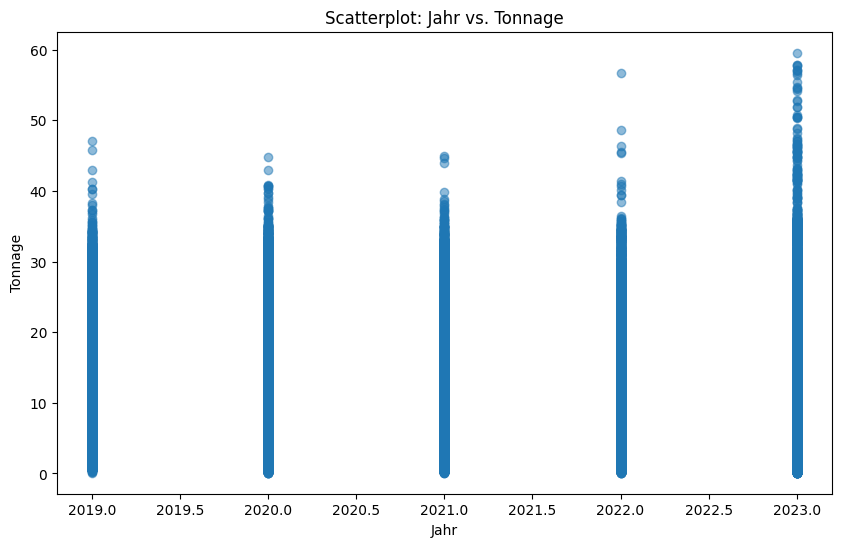

In [48]:
# Scatterplot von Tonnage im Vergleich zum Jahr
plt.figure(figsize=(10, 6))
plt.scatter(df['Jahr'], df['Tonnage'], alpha=0.5)
plt.title('Scatterplot: Jahr vs. Tonnage')
plt.xlabel('Jahr')
plt.ylabel('Tonnage')
plt.show()


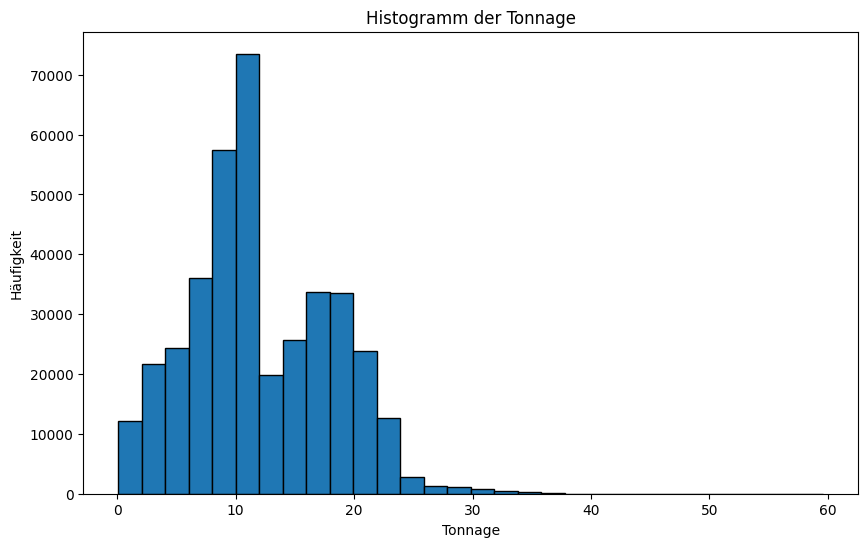

In [23]:
import matplotlib.pyplot as plt

# Histogramm der Tonnage
plt.figure(figsize=(10, 6))
plt.hist(df['Tonnage'], bins=30, edgecolor='black')
plt.title('Histogramm der Tonnage')
plt.xlabel('Tonnage')
plt.ylabel('Häufigkeit')
plt.show()


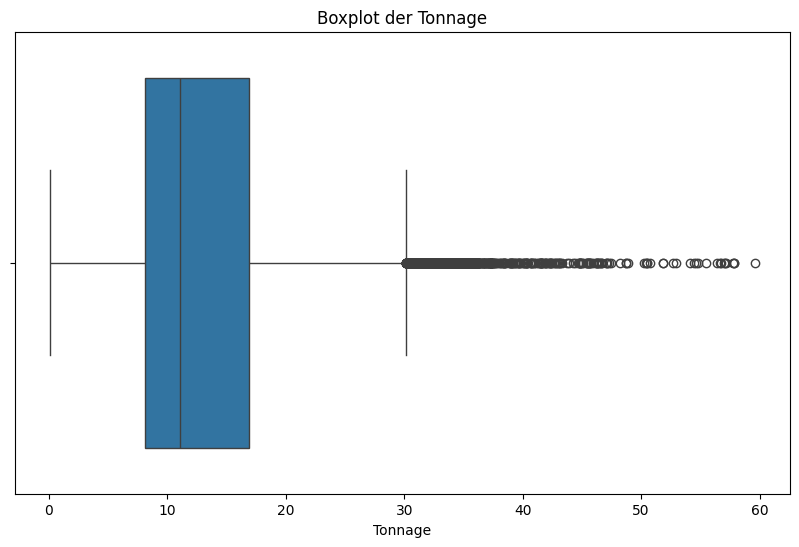

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot für Tonnage
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Tonnage'])
plt.title('Boxplot der Tonnage')
plt.show()


In [25]:
from scipy.stats import zscore

# Berechne den Z-Score für die Tonnage-Spalte
df['z_score'] = zscore(df['Tonnage'])

# Definiere eine Schwelle (z. B. |Z| > 3)
outliers_zscore = df[abs(df['z_score']) > 3]

print(outliers_zscore)


        Monat  KW  Jahr      Datum  Hof  Schicht  Tour  Tonnage Abfallart  \
77          1   1  2019 2019-01-02  VMG        1    12    32.08        HM   
90          1   1  2019 2019-01-02  VMG        1    25    33.02        HM   
97          1   1  2019 2019-01-02  VMG        1    32    37.26        HM   
101         1   1  2019 2019-01-02  VMG        1    36    32.39        HM   
221         1   1  2019 2019-01-02  VMN        1    40    32.35        HM   
...       ...  ..   ...        ...  ...      ...   ...      ...       ...   
381271     12  52  2023 2023-12-29  VMN        1     2    46.30        HM   
381275     12  52  2023 2023-12-29  VMN        1     5    35.28        HM   
381278     12  52  2023 2023-12-29  VMN        1     8    34.44        HM   
381281     12  52  2023 2023-12-29  VMN        1    11    37.29        HM   
381303     12  52  2023 2023-12-29  VMN        1    33    32.20        HM   

         z_score  
77      3.329447  
90      3.486288  
97      4.193739  

In [26]:
print(df["Abfallart"].unique())


['BIO' 'HM' 'SPM Sammlung']


In [27]:
df_bio = df[df["Abfallart"] == "BIO"]
df_hm = df[df["Abfallart"] == "HM"]
df_sm = df[df["Abfallart"] == "HM"]
print(df_bio.head())  # Zeigt die ersten Zeilen mit "BIO"
print(df_bio.shape)
print(df_hm.shape) 


   Monat  KW  Jahr      Datum  Hof  Schicht  Tour  Tonnage Abfallart   z_score
0      1   1  2019 2019-01-02  VMF        1     1     5.59       BIO -1.090458
1      1   1  2019 2019-01-02  VMF        1     4     3.23       BIO -1.484229
2      1   1  2019 2019-01-02  VMF        1     5     5.68       BIO -1.075442
3      1   1  2019 2019-01-02  VMF        1     6     5.48       BIO -1.108812
4      1   1  2019 2019-01-02  VMF        1     7     7.84       BIO -0.715042
(78948, 10)
(278814, 10)


In [32]:
# Nur Biomüll filtern
df_bio = df[df["Abfallart"] == "BIO"] 

# Gruppierung nach Monat
biomüll_pro_monat = df_bio.groupby("Monat")["Tonnage"].sum()

# Ausgabe
print(biomüll_pro_monat)

Monat
1     33915.90
2     31097.45
3     45449.35
4     53535.90
5     60159.91
6     56751.84
7     52032.12
8     52294.18
9     53980.94
10    54258.60
11    54432.28
12    40730.03
Name: Tonnage, dtype: float64


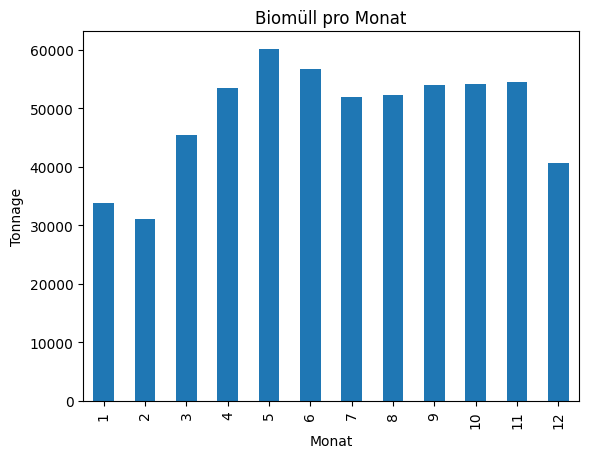

In [33]:
import matplotlib.pyplot as plt

biomüll_pro_monat.plot(kind="bar", title="Biomüll pro Monat")
plt.xlabel("Monat")
plt.ylabel("Tonnage")
plt.show()


In [35]:
# Nur Hausmüll filtern
df_hm = df[df["Abfallart"] == "HM"]  

# Gruppierung nach Monat
hausmüll_pro_monat = df_hm.groupby("Monat")["Tonnage"].sum()

# Ausgabe
print(hausmüll_pro_monat)

Monat
1     332616.74
2     297913.13
3     340841.21
4     338479.85
5     346420.12
6     336993.74
7     324204.45
8     331415.19
9     323097.81
10    333185.56
11    330653.48
12    334247.52
Name: Tonnage, dtype: float64


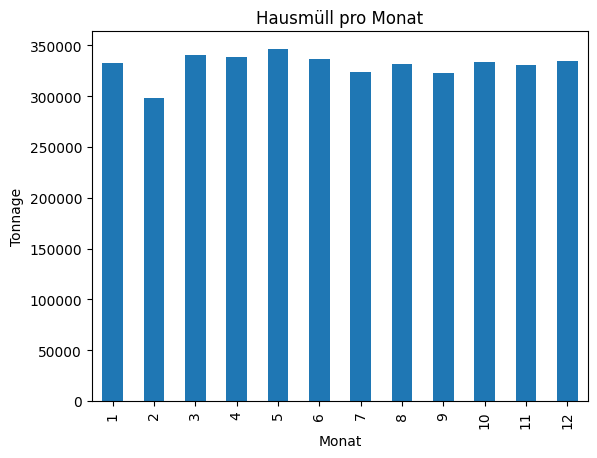

In [36]:
import matplotlib.pyplot as plt

hausmüll_pro_monat.plot(kind="bar", title="Hausmüll pro Monat")
plt.xlabel("Monat")
plt.ylabel("Tonnage")
plt.show()


In [37]:
# Nur Sperrmüll filtern
df_sm = df[df["Abfallart"] == "SPM Sammlung"] 

# Gruppierung nach Monat
sperrmüll_pro_monat = df_sm.groupby("Monat")["Tonnage"].sum()

# Ausgabe
print(sperrmüll_pro_monat)

Monat
1     5039.73
2     4795.69
3     6131.92
4     6485.60
5     6829.43
6     6413.19
7     5647.50
8     5584.07
9     5651.85
10    5700.39
11    5597.67
12    5229.83
Name: Tonnage, dtype: float64


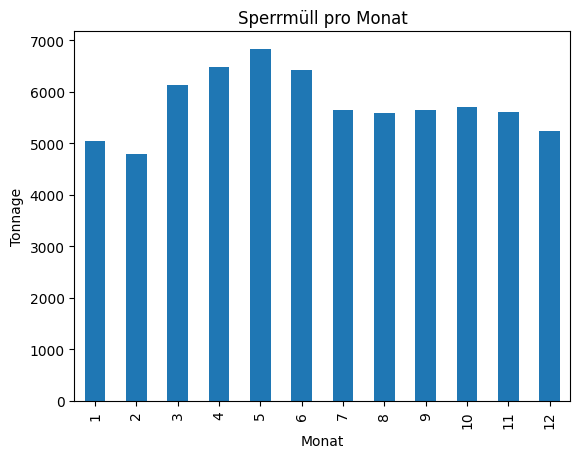

In [38]:
import matplotlib.pyplot as plt

sperrmüll_pro_monat.plot(kind="bar", title="Sperrmüll pro Monat")
plt.xlabel("Monat")
plt.ylabel("Tonnage")
plt.show()

In [39]:
df_hm = df[df["Abfallart"] == "HM"]
df_spm = df[df["Abfallart"] == "SPM Sammlung"]

print("BIO:", df_bio.shape[0], "Zeilen")
print("HM:", df_hm.shape[0], "Zeilen")
print("SPM Sammlung:", df_spm.shape[0], "Zeilen")


BIO: 78948 Zeilen
HM: 278814 Zeilen
SPM Sammlung: 23898 Zeilen


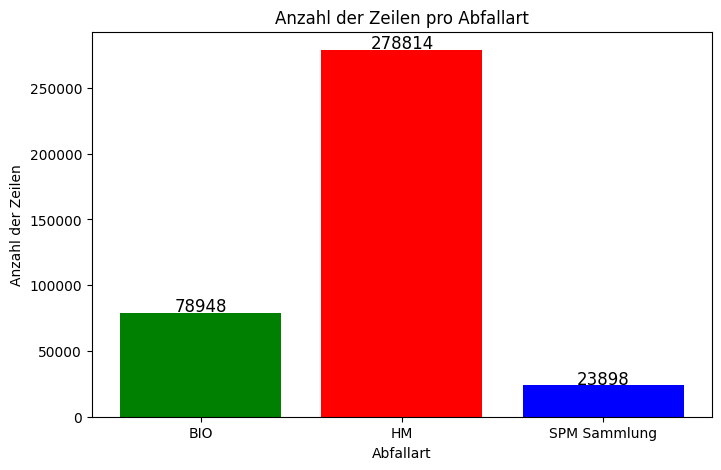

In [40]:
import matplotlib.pyplot as plt

# Daten für das Diagramm
abfallarten = ["BIO", "HM", "SPM Sammlung"]
anzahl_zeilen = [df_bio.shape[0], df_hm.shape[0], df_spm.shape[0]]

# Balkendiagramm erstellen
plt.figure(figsize=(8, 5))
plt.bar(abfallarten, anzahl_zeilen, color=["green", "red", "blue"])

# Titel und Achsenbeschriftungen
plt.title("Anzahl der Zeilen pro Abfallart")
plt.xlabel("Abfallart")
plt.ylabel("Anzahl der Zeilen")

# Werte auf die Balken schreiben
for i, v in enumerate(anzahl_zeilen):
    plt.text(i, v + 1000, str(v), ha="center", fontsize=12)

# Diagramm anzeigen
plt.show()


In [36]:
print(df["Hof"].unique())

['VMF' 'VMG' 'VMM' 'VMN' 'VMWSF' 'VMWSN' 'VMWSM']


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Sicherstellen, dass die Spalte "Tonnage" numerisch ist
df["Tonnage"] = pd.to_numeric(df["Tonnage"], errors="coerce")

# Gruppieren nach Hof und Abfallart und Summe der Tonnage berechnen
df_grouped = df.groupby(["Hof", "Abfallart"])["Tonnage"].sum().unstack()

# Fehlende Werte mit 0 ersetzen
df_grouped = df_grouped.fillna(0)

# Pro Hof den prozentualen Anteil berechnen
df_percent = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Anzeigen der ersten Zeilen
print(df_percent.head())


Abfallart        BIO         HM  SPM Sammlung
Hof                                          
VMF        12.890644  87.109356           0.0
VMG        13.541820  86.458180           0.0
VMM        11.375777  88.624223           0.0
VMN        13.571717  86.428283           0.0
VMWSF       0.000000   0.000000         100.0
